# FedNLP dataset



- Data collected period : January 2015 - July 2020
- FOMC documents : statements, minutes, and press conferences (122 docs)
- FOMC members’ speeches : various sources (1300 docs)


In [1]:
# Code to download file into Colaboratory:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

google_docs = {
    '1A3y3jb0_kMnLBVWnZdTo8EuQRb81FPxs' : 'fomc_doc.pkl',
    '1--tLNPZswGt4tXPQMN0TD2TCN15LqinF' : 'speaker_doc.pkl',
}

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

for key in google_docs:
  drive.CreateFile({'id':key}).GetContentFile(google_docs[key])

### FOMC data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fomc_document = pd.read_pickle("fomc_doc.pkl")
fomc_document

,date,type,decision,high,low,document,word_count
93,20150128,minutes,maintain,0,0.25,Minutes of the Federal Open Market Committee ...,14364
61,20190130,minutes,maintain,2.25,2.5,Minutes of the Federal Open Market Committee ...,14114
85,20160127,minutes,maintain,0.25,0.5,Minutes of the Federal Open Market Committee ...,13566
53,20200129,minutes,maintain,1.5,1.75,Minutes of the Federal Open Market Committee ...,13131
55,20191030,minutes,lower,1.5,1.75,Minutes of the Federal Open Market Committee ...,12548
...,...,...,...,...,...,...,...
6,20200129,statement,maintain,1.5,1.75,"January 29, 2020 Federal Reserve issues FOMC...",332
18,20180801,statement,maintain,1.75,2,"August 01, 2018 Federal Reserve issues FOMC ...",329
16,20181108,statement,maintain,2,2.25,"November 08, 2018 Federal Reserve issues FOM...",324
17,20180926,statement,raise,2,2.25,"September 26, 2018 Federal Reserve issues FO...",311


In [5]:
fomc_document.groupby('decision').count()['document'].sort_values(ascending=False)

decision
maintain    80
raise       27
lower       15
Name: document, dtype: int64

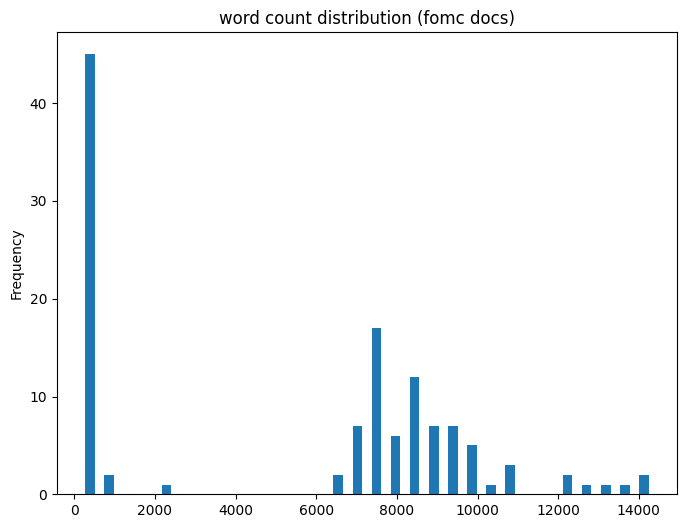

In [6]:
count = fomc_document['word_count'].plot(kind='hist',bins=30, rwidth=0.5,
                                           title = 'word count distribution (fomc docs)',
                                           figsize=(8, 6))
plt.show()

### speaker data

In [7]:
speaker = pd.read_pickle("speaker_doc.pkl")
speaker

,fomc-ref-date,date,decision,high,low,domain,participant,document,word_count
125,20200729,20200716,maintain,0,0.25,www.newyorkfed.org,John Williams,speech rising to the challenge central ban...,1277
171,20200729,20200715,maintain,0,0.25,www.philadelphiafed.org,Patrick Harker,"Good afternoon, everybody, and thanks to Suze...",1775
911,20200729,20200714,maintain,0,0.25,www.federalreserve.gov,Lael Brainard,Navigating Monetary Policy through the Fog of ...,2175
734,20200729,20200714,maintain,0,0.25,www.stlouisfed.org,James Bullard,"July 14, 2020 Presentation (pdf) | Press Rele...",139
186,20200729,20200714,maintain,0,0.25,www.philadelphiafed.org,Patrick Harker,"﻿Hello, everybody, and thank you to Matuschka ...",1249
...,...,...,...,...,...,...,...,...,...
333,20150128,20150112,maintain,0,0.25,www.frbatlanta.org,Dennis Lockhart,A Potentially Momentous Year for Policy Den...,2273
545,20150128,20150109,maintain,0,0.25,www.bloomberg.com,Dennis Lockhart,WORD HEADLINES FROM AROUND THE WORLD. &gt;&...,241
419,20150128,20150109,maintain,0,0.25,www.richmondfed.org,Jeffrey Lacker,...,2539
1205,20150128,20150108,maintain,0,0.25,www.minneapolisfed.org,Narayana Kocherlakota,Thanks for joining us here tonight. The plan ...,1279


In [8]:
speaker.groupby('decision').count()['document'].sort_values(ascending=False)

decision
maintain    897
raise       265
lower       138
Name: document, dtype: int64

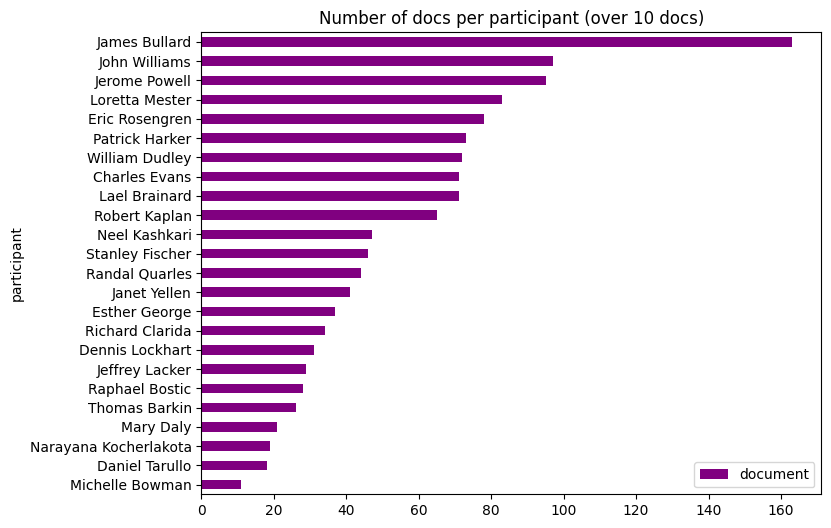

In [9]:
speaker_count = pd.DataFrame(speaker.groupby('participant').count()['document'].sort_values(ascending=True))
speaker_count.plot.barh(y='document', title='Number of docs per participant (over 10 docs)', color = 'purple', figsize=(8, 6))
plt.show()

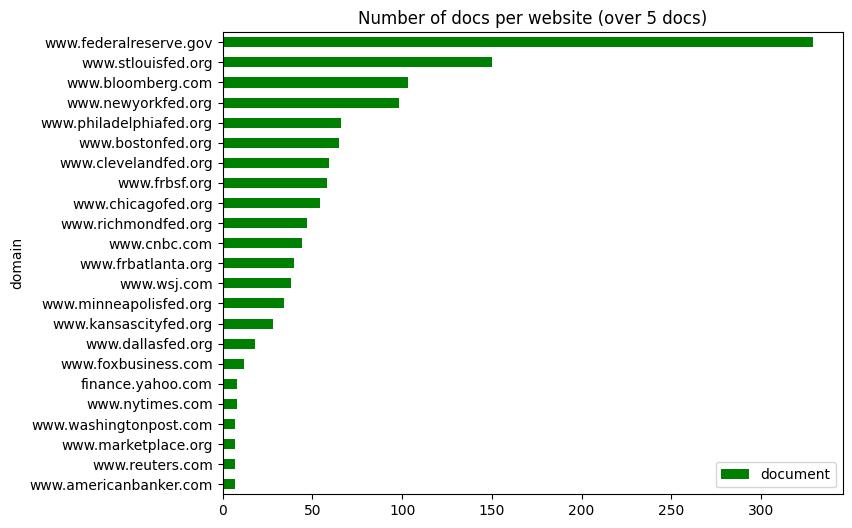

In [10]:
speaker_src = pd.DataFrame(speaker.groupby('domain').count()['document'].sort_values(ascending=True))
speaker_src = speaker_src[speaker_src['document'] > 5]

speaker_src.plot.barh(y='document', title='Number of docs per website (over 5 docs)', color = 'green', figsize=(8, 6))
plt.show()

### Total

In [11]:
data_df = pd.concat([fomc_document[['date','type','document','word_count','decision']],speaker[['date','domain','document','word_count','decision']].rename(columns={'domain':'type'})])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 93 to 339
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1422 non-null   object
 1   type        1422 non-null   object
 2   document    1422 non-null   object
 3   word_count  1422 non-null   int64 
 4   decision    1422 non-null   object
dtypes: int64(1), object(4)
memory usage: 66.7+ KB


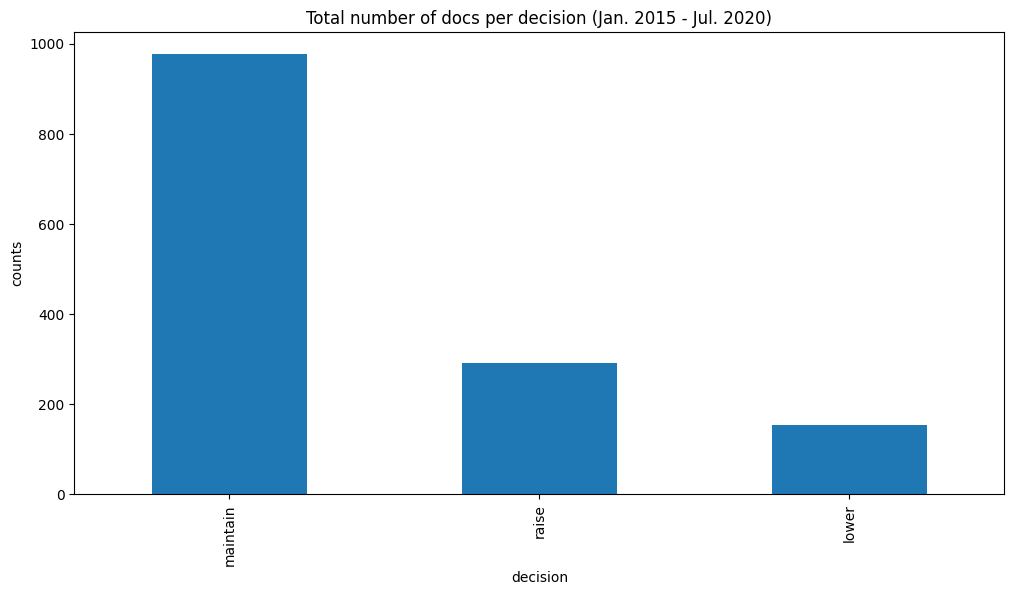

In [12]:
df_dist = data_df.groupby('decision').count()['document'].sort_values(ascending=False)
df_dist.plot(kind='bar', title='Total number of docs per decision (Jan. 2015 - Jul. 2020)',figsize=(12, 6))

plt.ylabel('counts')
plt.show()

### Training set and Test set

- training set : FOMC docs + speaker (70%)
- test set : speaker (30%)

In order to predict Federal Funds Rate based on analysis of FOMC members' speeches, we only includes FOMC docs to training set becasue it is a post statement.

In [13]:
from sklearn.utils import shuffle

train_speaker_len = int(len(speaker) * 0.7)

train_df = pd.concat([fomc_document[['decision','word_count','document']],speaker[['decision','word_count','document']][:train_speaker_len]])
test_df = speaker[['decision','word_count','document']][train_speaker_len:]

train_df = shuffle(train_df, random_state=42)
test_df = shuffle(test_df, random_state=42)

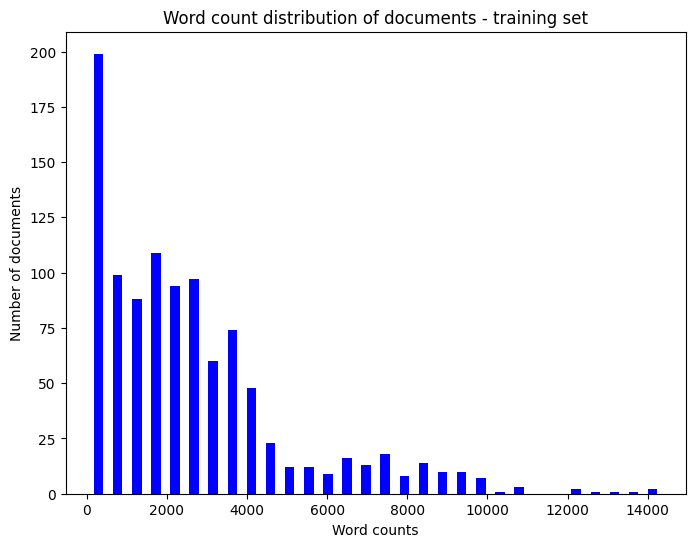

In [14]:
count = train_df['word_count'].plot(kind='hist',bins=30, rwidth=0.5,
                                           title = 'Word count distribution of documents - training set', color = 'blue',
                                           figsize=(8, 6))
plt.ylabel('Number of documents')
plt.xlabel('Word counts')
plt.show()

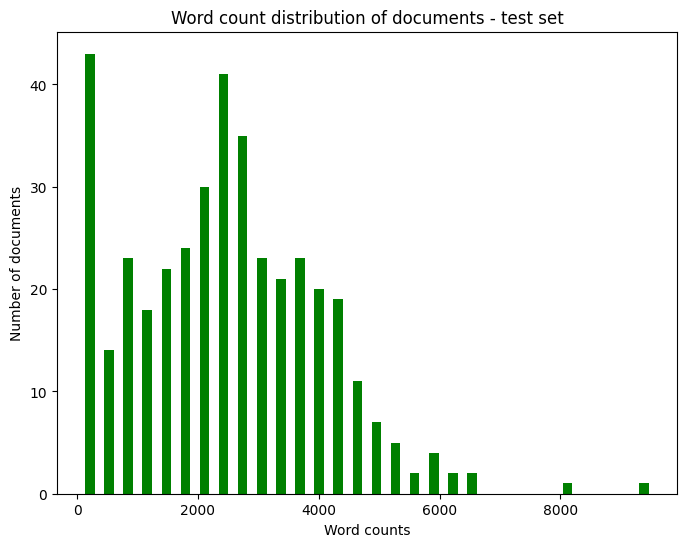

In [15]:
count = test_df['word_count'].plot(kind='hist',bins=30, rwidth=0.5,
                                           title = 'Word count distribution of documents - test set', color = 'green',
                                           figsize=(8, 6))
plt.ylabel('Number of documents')
plt.xlabel('Word counts')
plt.show()